# Scratch File for Giles. No one else should edit or check in.

In [334]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import shared_utils as su
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as ply

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [254]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.options.mode.chained_assignment = None  # default='warn'

In [81]:
df = su.read_trip_data()
df.head()

,Trip_ID,Duration,Start_Date,Start_Station,Start_Terminal,End_Date,End_Station,End_Terminal,Bike_#,Subscriber_Type,Zip_Code
0,913460,765,2015-08-31 23:26:00,Harry Bridges Plaza (Ferry Building),50,2015-08-31 23:39:00,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,2015-08-31 23:11:00,San Antonio Shopping Center,31,2015-08-31 23:28:00,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,2015-08-31 23:13:00,Post at Kearny,47,2015-08-31 23:18:00,2nd at South Park,64,468,Subscriber,94107
3,913454,409,2015-08-31 23:10:00,San Jose City Hall,10,2015-08-31 23:17:00,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,2015-08-31 23:09:00,Embarcadero at Folsom,51,2015-08-31 23:22:00,Embarcadero at Sansome,60,487,Customer,9069


In [242]:
status = pd.read_csv('/Users/gochs/Documents/MIDS/Python_Bridge/Project_2/Data Sets/babs_open_data_year_1/201402_babs_open_data/201402_status_data.csv')
status.head()
#will need to be changed to remote address

,Trip_ID,Duration,Start_Date,Start_Station,Start_Terminal,End_Date,End_Station,End_Terminal,Bike_#,Subscriber_Type,Zip_Code
0,913460,765,2015-08-31 23:26:00,Harry Bridges Plaza (Ferry Building),50,2015-08-31 23:39:00,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,2015-08-31 23:11:00,San Antonio Shopping Center,31,2015-08-31 23:28:00,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,2015-08-31 23:13:00,Post at Kearny,47,2015-08-31 23:18:00,2nd at South Park,64,468,Subscriber,94107
3,913454,409,2015-08-31 23:10:00,San Jose City Hall,10,2015-08-31 23:17:00,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,2015-08-31 23:09:00,Embarcadero at Folsom,51,2015-08-31 23:22:00,Embarcadero at Sansome,60,487,Customer,9069


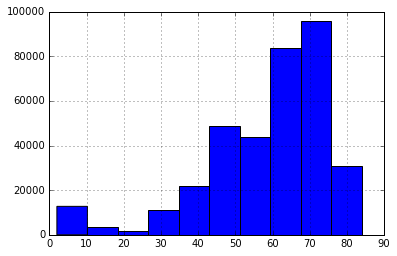

In [110]:
df.Start_Terminal.hist()

In [120]:
start = df.groupby('Start_Station').Trip_ID.count()
end =  df.groupby('End_Station').Trip_ID.count() 
diff = start - end
diff = diff.sort_values()

In [151]:
diff

,Trip_ID
Start_Station,
San Francisco Caltrain (Townsend at 4th),-8506
Market at Sansome,-2485
Townsend at 7th,-1670
2nd at Townsend,-1437
Embarcadero at Vallejo,-1109
Embarcadero at Sansome,-907
Washington at Kearny,-821
Yerba Buena Center of the Arts (3rd @ Howard),-765
San Francisco Caltrain 2 (330 Townsend),-765


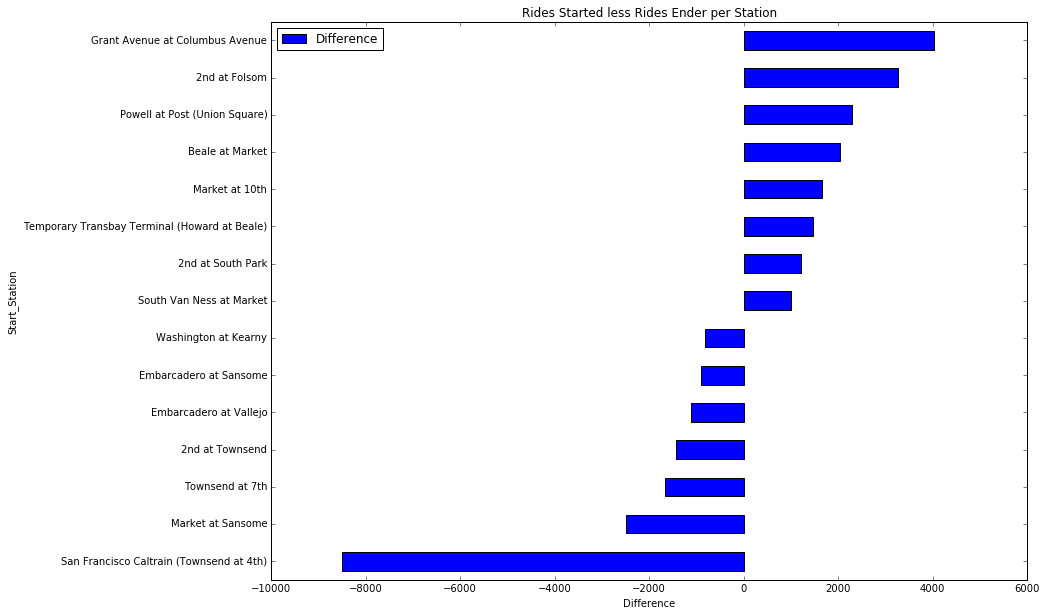

In [364]:
ax = diff.Trip_ID[diff.Trip_ID.abs() > 800].plot(kind='barh',figsize =(15,10), title = 'Rides Started less Rides Ender per Station',legend=True,label='Difference')
plt.gcf().subplots_adjust(left=0.20)
fig = ax.get_figure()
ax.set_xlabel("Difference")
fig.savefig('startstopdiff.png')

In [ ]:
status_indexed = status.copy()
status_indexed.index = (range(len(status)))

In [370]:
# Finding Number of Instances (minutes) the stations with the greateast positive trip difference had zero bikes
# * 2nd at Folsom is Terminal 62
# * Grant Avenue at Columus is 73
# * Powel at Post is 71
# * Temporary Transbay Terminal (Howard at Beale) is 55
# * Market at 10th 67
# * Beale at Market 56

folsom = status_indexed.groupby(['station_id', 'bikes_available']).get_group((62, 0)).bikes_available.count()
grant = status_indexed.groupby(['station_id', 'bikes_available']).get_group((73, 0)).bikes_available.count()
powel = status_indexed.groupby(['station_id', 'bikes_available']).get_group((71, 0)).bikes_available.count()
transbay = status_indexed.groupby(['station_id', 'bikes_available']).get_group((55, 0)).bikes_available.count()
tenth = status_indexed.groupby(['station_id', 'bikes_available']).get_group((67, 0)).bikes_available.count()
beale = transbay = status_indexed.groupby(['station_id', 'bikes_available']).get_group((56, 0)).bikes_available.count()

In [371]:
# Finding Number of Instances (minutes) the stations with the greateast negative trip difference had zero bikes
# * Townsend at 7th is 65
# * San Francisco Caltrain (Townsend at 4th) is 70
# * Market at Sansome is 77
# * 2nd at Townsend is 61
# * Embarcadero at Vallejo is 48
# * Embarcadero at Sansone is 60


townsend = status_indexed.groupby(['station_id', 'bikes_available']).get_group((65, 0)).bikes_available.count()
caltrain = status_indexed.groupby(['station_id', 'bikes_available']).get_group((70, 0)).bikes_available.count()
market = status_indexed.groupby(['station_id', 'bikes_available']).get_group((77, 0)).bikes_available.count()
second = status_indexed.groupby(['station_id', 'bikes_available']).get_group((61, 0)).bikes_available.count()
vallejo = status_indexed.groupby(['station_id', 'bikes_available']).get_group((48, 0)).bikes_available.count()
sansone = status_indexed.groupby(['station_id', 'bikes_available']).get_group((60, 0)).bikes_available.count()


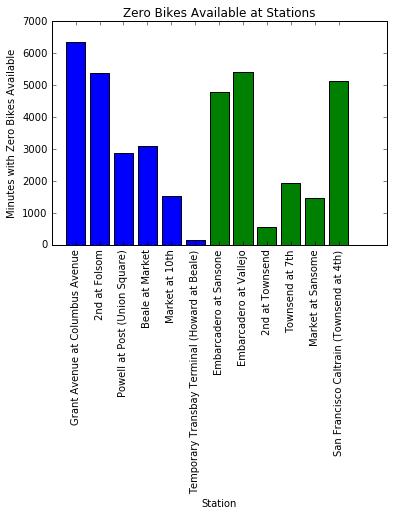

In [391]:
stations = [1,2,3,4,5,6,7,8,9,10,11,12]
no_bikes = [grant, folsom, powel, beale, tenth, transbay, sansone, vallejo, second, townsend, market, caltrain]

LABELS = ['Grant Avenue at Columbus Avenue', '2nd at Folsom', 'Powell at Post (Union Square)', 'Beale at Market', 'Market at 10th', 'Temporary Transbay Terminal (Howard at Beale)', 'Embarcadero at Sansone', 'Embarcadero at Vallejo', '2nd at Townsend' ,'Townsend at 7th', 'Market at Sansome','San Francisco Caltrain (Townsend at 4th)']
my_colors = ['b', 'b', 'b', 'b', 'b', 'b', 'g','g','g','g','g','g']
ax = plt.bar(stations, no_bikes, align='center', color = my_colors)
plt.xticks(stations, LABELS, rotation=90)
plt.title('Zero Bikes Available at Stations')
plt.xlabel('Station')
plt.ylabel('Minutes with Zero Bikes Available')
plt.show()


# line_up, = plt.plot([1,2,3], label='Line 2')
# line_down, = plt.plot([3,2,1], label='Line 1')
# plt.legend([line_up, line_down], ['Line Up', 'Line Down'])

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles, labels)

# figure = ax.get_figure()
# figure.savefig('no_bikes.png')
# won't save?

In [332]:
df.groupby(['Start_Station', 'Start_Terminal']).describe()
# .get_group(('San Pedro Square', 6))

Bike_#  \
Start_Station                                 Start_Terminal                       
2nd at Folsom                                 62             count   7999.000000   
                                                             mean     438.780098   
                                                             std      141.545653   
                                                             min       15.000000   
                                                             25%      350.000000   
                                                             50%      448.000000   
                                                             75%      548.000000   
                                                             max      878.000000   
2nd at South Park                             64             count   9469.000000   
                                                             mean     440.245538   
                                                             std      141.078884   
                                                             min       15.000000   
                                                             25%      351.000000   
                                                             50%      449.000000   
                                                             75%      548.000000   
                                                             max      878.000000   
2nd at Townsend                               61             count  14026.000000   
                                                             mean     439.822972   
                                                             std      139.117208   
                                                             min       16.000000   
                                                             25%      352.000000   
                                                             50%      448.000000   
                                                             75%      546.000000   
                                                             max      878.000000   
5th at Howard                                 57             count   7708.000000   
                                                             mean     438.106383   
                                                             std      141.287207   
                                                             min       15.000000   
                                                             25%      351.000000   
                                                             50%      449.000000   
                                                             75%      544.000000   
                                                             max      878.000000   
Adobe on Almaden                              5              count    562.000000   
                                                             mean     258.642349   
                                                             std      230.241248   
                                                             min        9.000000   
                                                             25%       88.250000   
                                                             50%      184.500000   
                                                             75%      301.000000   
                                                             max      716.000000   
Arena Green / SAP Center                      14             count    647.000000   
                                                             mean     259.913447   
                                                             std      233.740791   
                                                             min        9.000000   
                                                             25%       93.000000   
                                                             50%      178.000000   
                                          

In [373]:
# Finding Number of Instances (minutes) the stations with the greateast positive trip difference had zero stations
# * 2nd at Folsom is Terminal 62
# * Grant Avenue at Columus is 73
# * Powel at Post is 71
# * Temporary Transbay Terminal (Howard at Beale) is 55
# * Market at 10th 67
# * Beale at Market 56

folsom1 = status_indexed.groupby(['station_id', 'docks_available']).get_group((62, 0)).bikes_available.count()
grant1 = status_indexed.groupby(['station_id', 'docks_available']).get_group((73, 0)).bikes_available.count()
powel1 = status_indexed.groupby(['station_id', 'docks_available']).get_group((71, 0)).bikes_available.count()
transbay1 = status_indexed.groupby(['station_id', 'docks_available']).get_group((55, 0)).bikes_available.count()
tenth1 = status_indexed.groupby(['station_id', 'docks_available']).get_group((67, 0)).bikes_available.count()
beale1 = transbay = status_indexed.groupby(['station_id', 'docks_available']).get_group((56, 0)).bikes_available.count()

In [374]:
# Finding Number of Instances (minutes) the stations with the greateast negativezero stations trip difference had zero stations
# * Townsend at 7th is 65
# * San Francisco Caltrain (Townsend at 4th) is 70
# * Market at Sansome is 77
# * 2nd at Townsend is 61
# * Embarcadero at Vallejo is 48
# * Embarcadero at Sansone is 60


townsend1 = status_indexed.groupby(['station_id', 'docks_available']).get_group((65, 0)).bikes_available.count()
caltrain1 = status_indexed.groupby(['station_id', 'docks_available']).get_group((70, 0)).bikes_available.count()
market1 = status_indexed.groupby(['station_id', 'docks_available']).get_group((77, 0)).bikes_available.count()
second1 = status_indexed.groupby(['station_id', 'docks_available']).get_group((61, 0)).bikes_available.count()
vallejo1 = status_indexed.groupby(['station_id', 'docks_available']).get_group((48, 0)).bikes_available.count()
sansone1 = status_indexed.groupby(['station_id', 'docks_available']).get_group((60, 0)).bikes_available.count()

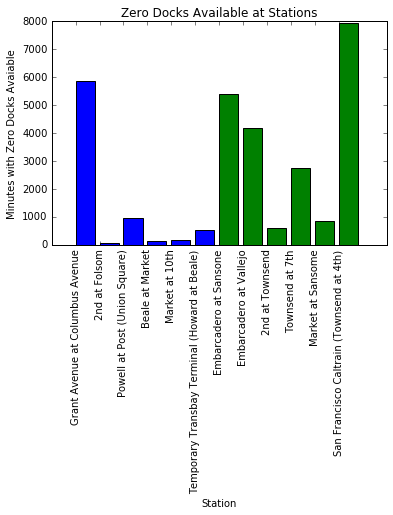

In [379]:
stations = [1,2,3,4,5,6,7,8,9,10,11,12]
no_bikes = [grant1, folsom1, powel1, beale1, tenth1, transbay1, sansone1, vallejo1, second1, townsend1, market1, caltrain1]

LABELS = ['Grant Avenue at Columbus Avenue', '2nd at Folsom', 'Powell at Post (Union Square)', 'Beale at Market', 'Market at 10th', 'Temporary Transbay Terminal (Howard at Beale)', 'Embarcadero at Sansone', 'Embarcadero at Vallejo', '2nd at Townsend' ,'Townsend at 7th', 'Market at Sansome','San Francisco Caltrain (Townsend at 4th)']
my_colors = ['b', 'b', 'b', 'b', 'b', 'b', 'g','g','g','g','g','g']
ax = plt.bar(stations, no_bikes, align='center', color = my_colors,)
plt.xticks(stations, LABELS, rotation=90)
plt.title('Zero Docks Available at Stations')
plt.xlabel('Station')
plt.ylabel('Minutes with Zero Docks Avaiable')
plt.show()